# 🧠 EDA on Data Science Job Salaries
**Author:** Rishav Kumar Sharma  
**Date:** 2025-05-12  
**Tools Used:** Python, Pandas, Seaborn, Matplotlib

## 📌 Objective
This project aims to analyze trends and insights in data science job salaries across the world using an open dataset. The focus is on understanding how experience, job type, location, and company size impact compensation.

## 📂 Dataset Overview
The dataset contains over 600 job records from 2020 to 2022, including features such as:
- Experience level
- Employment type
- Job title
- Salary (standardized to USD)
- Work location and company location
- Remote work ratio


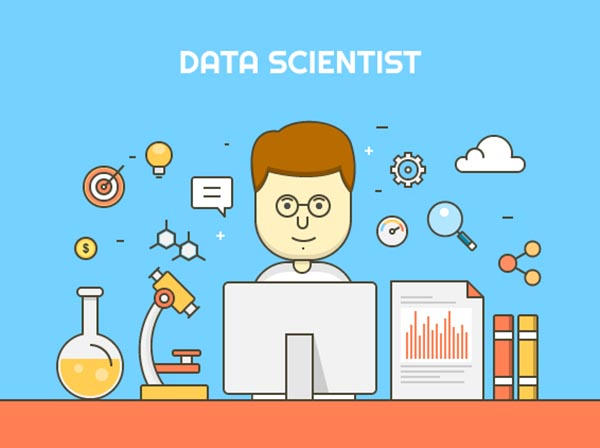

In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [88]:
data=pd.read_csv(r"/Users/rishavkumarsharma/Downloads/Data Science Job Salaries.csv")


# DATA SIZE

In [91]:
data.shape

(607, 12)

# HOW IS DATA LOOKS LIKE

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


# Do Data have missing values?

In [97]:
data.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

# Checking the Dataset

In [100]:
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


**Here We Can See That The Data Is Not Clearly Readable Or We Have Data Like MI Or SE In experiencelevel So I Will Make It Readable Easily and same with the employment type and company size**

In [103]:
# We'll update some columns' values based on the data description
data["employment_type"] = data["employment_type"].replace({"FT": "Full Time", "PT": "Part Time", "CT": "Contract", "FL": "Freelance"})
data["company_size"] = data["company_size"].replace({"S": "Small", "M": "Medium", "L":"Large"})
data["experience_level"] = data["experience_level"].replace({"EN": "Entry Level/Junior", "MI": "Mid Level/Intermediate", "SE": "Senior Level/Expert", "EX": "Executive Level/Director"})

In [105]:
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,Mid Level/Intermediate,Full Time,Data Scientist,70000,EUR,79833,DE,0,DE,Large
1,1,2020,Senior Level/Expert,Full Time,Machine Learning Scientist,260000,USD,260000,JP,0,JP,Small
2,2,2020,Senior Level/Expert,Full Time,Big Data Engineer,85000,GBP,109024,GB,50,GB,Medium
3,3,2020,Mid Level/Intermediate,Full Time,Product Data Analyst,20000,USD,20000,HN,0,HN,Small
4,4,2020,Senior Level/Expert,Full Time,Machine Learning Engineer,150000,USD,150000,US,50,US,Large


# Applying EDA

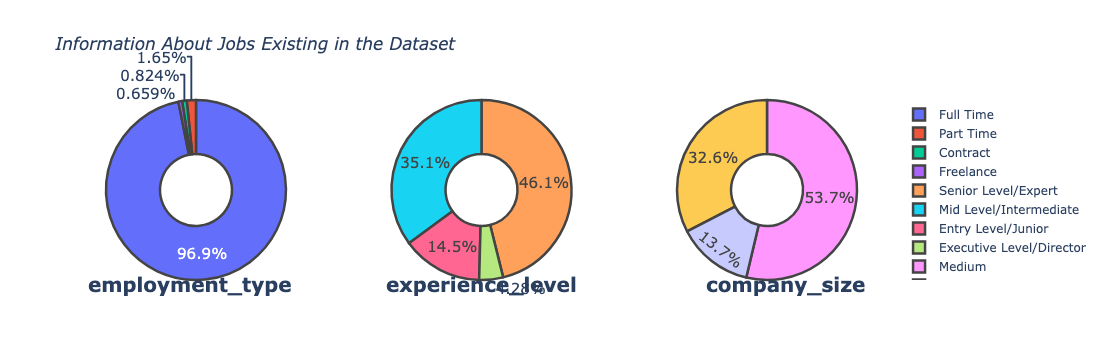

In [108]:
#Level Of Experience And Types Of Employes and Working Where 
annotations = []
x_positions = [0.007, 0.50, 0.98]

fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]],)
                    #subplot_titles=["<b>Employment Type</b>","<b>Experience Level</b>", "<b>Company Size</b>"])

for i, col in enumerate(["employment_type", "experience_level", "company_size"]):
    fig.add_trace(go.Pie(labels=data[col].value_counts().index,
                         values=data[col].value_counts().values,
                         marker=dict(line=dict(width=2.5)), textfont_size=15,
                         hole=.40, hovertemplate="%{label}: %{value}<extra></extra>"), 1, i+1)
    annotations.append(dict(text=f'<b>{col}</b>', x=x_positions[i], y=-0.1, font_size=20, showarrow=False))

fig.update_layout(title=f"<i>Information About Jobs Existing in the Dataset</i>", annotations=annotations)
fig.show()

**In this Dataset:**

- The big majority of jobs are Full Time (96.9%).
- Senior/Expert Level is the most present experience level.
- More than half of the companies in the dataset are large ones.

## Bar Plot:
A bar plot or bar chart is a graph that represents the category of data with rectangular bars with lengths and heights that is proportional to the values which they represent. 

## Pie Chart:
A Pie Chart is a circular statistical plot that can display only one series of data. The area of the chart is the total percentage of the given data. The area of slices of the pie represents the percentage of the parts of the data.


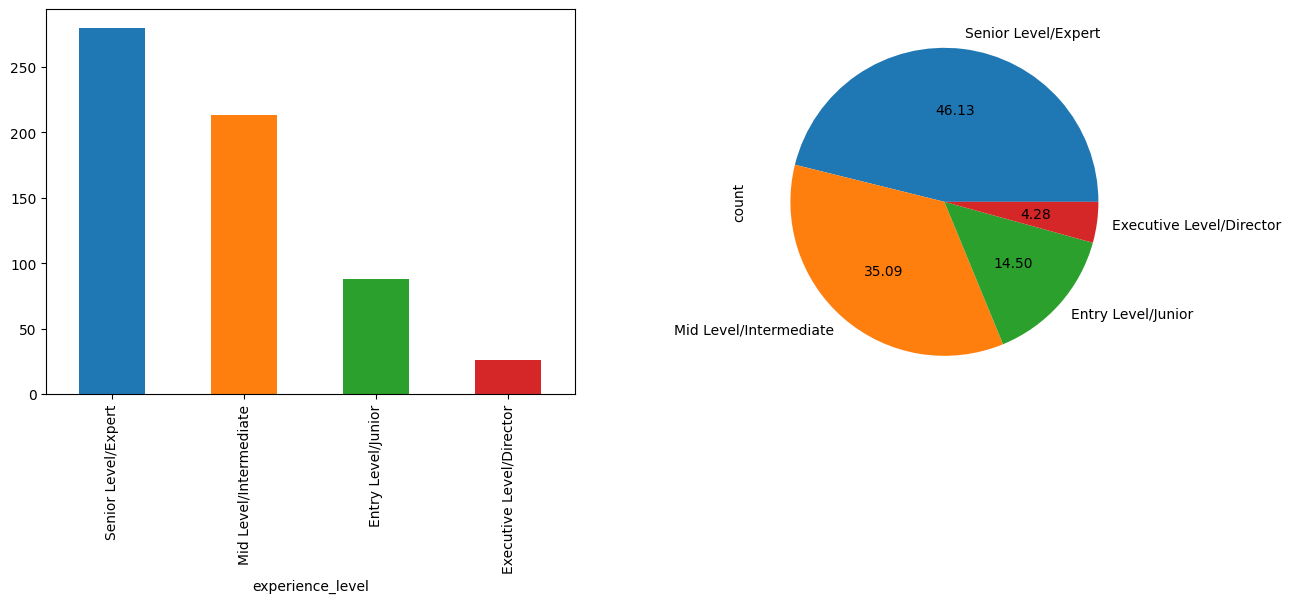

In [112]:
#level of Experience
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
data['experience_level'].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))
plt.subplot(1,2,2)
data['experience_level'].value_counts().plot(kind='pie',autopct="%.2f")
plt.show()

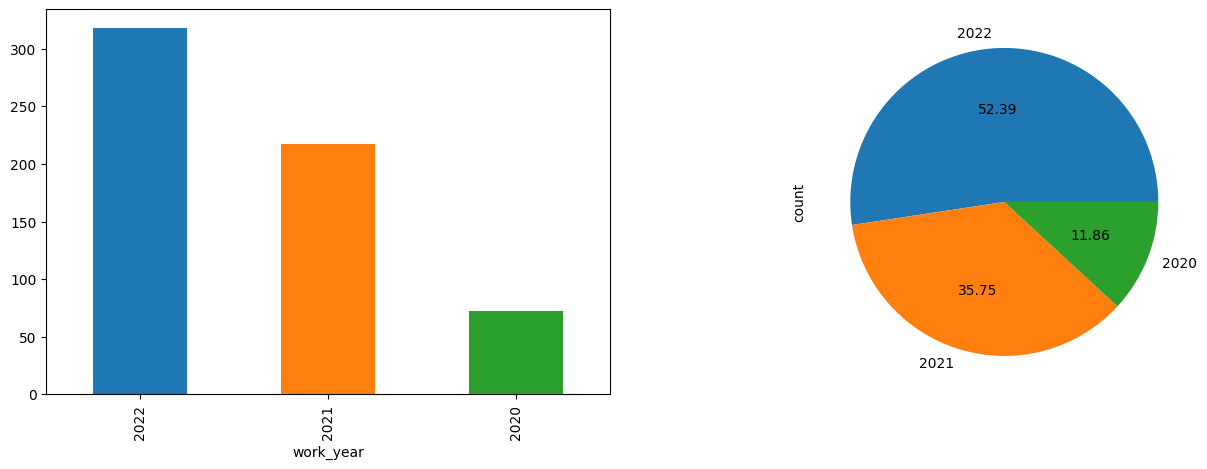

In [114]:
#employees in every year
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
data['work_year'].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))
plt.subplot(1,2,2)
data['work_year'].value_counts().plot(kind='pie',autopct="%.2f")

plt.show()

<Axes: ylabel='count'>

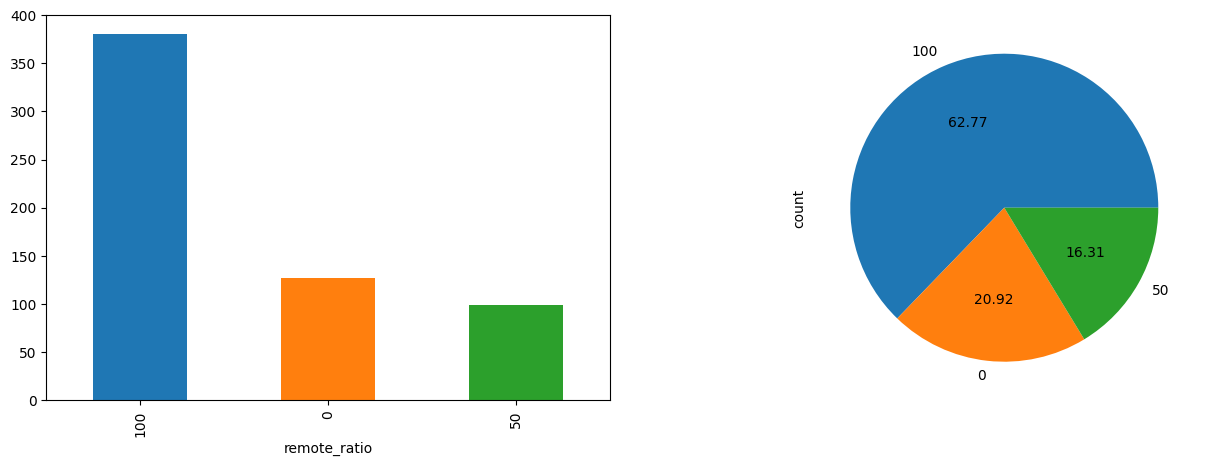

In [116]:
#remote jobs ratio
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
data['remote_ratio'].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))
plt.subplot(1,2,2)
data['remote_ratio'].value_counts().plot(kind='pie',autopct="%.2f")

<Axes: ylabel='count'>

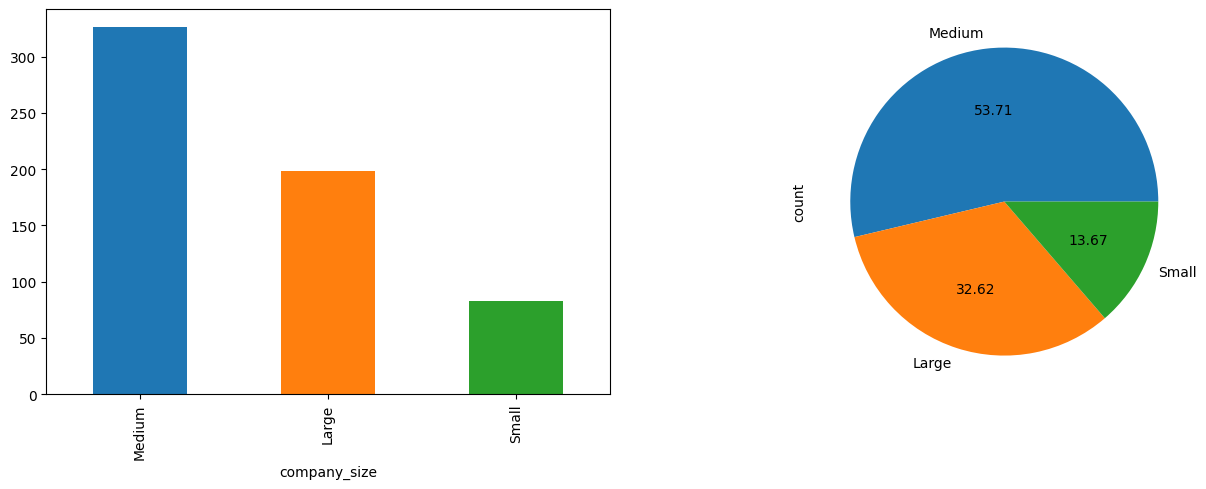

In [118]:
#company size
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
data['company_size'].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))
plt.subplot(1,2,2)
data['company_size'].value_counts().plot(kind='pie',autopct="%.2f")

<Axes: xlabel='salary_currency'>

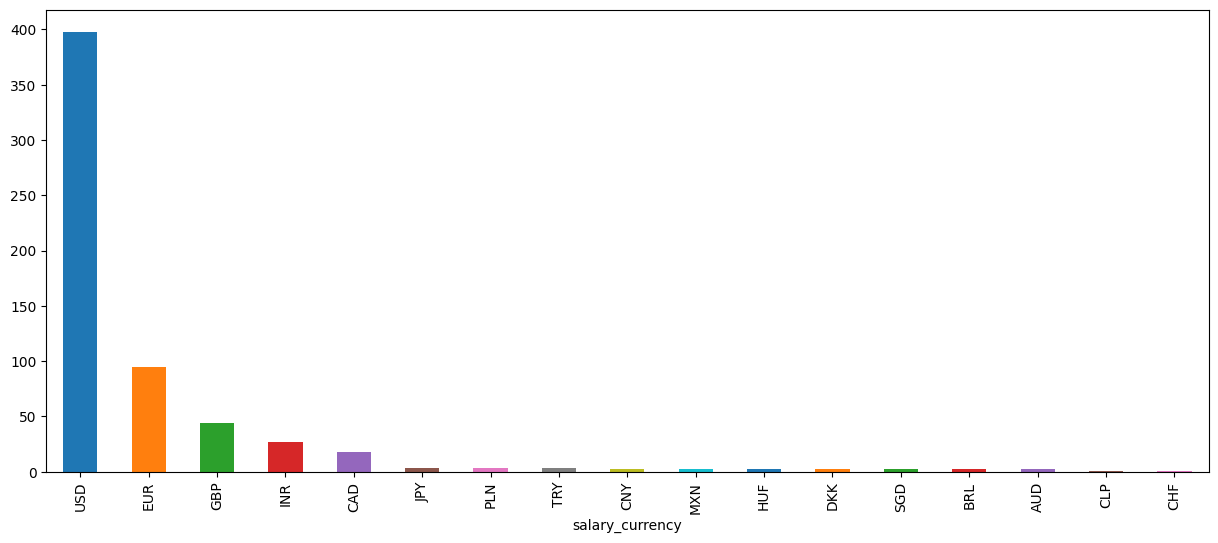

In [120]:
#company size that how many employes can we have
plt.figure(figsize=(33,6))
plt.subplot(1,2,1)
data['salary_currency'].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))


<Axes: title={'center': 'Number Of Jobs By Country'}, xlabel='company_location'>

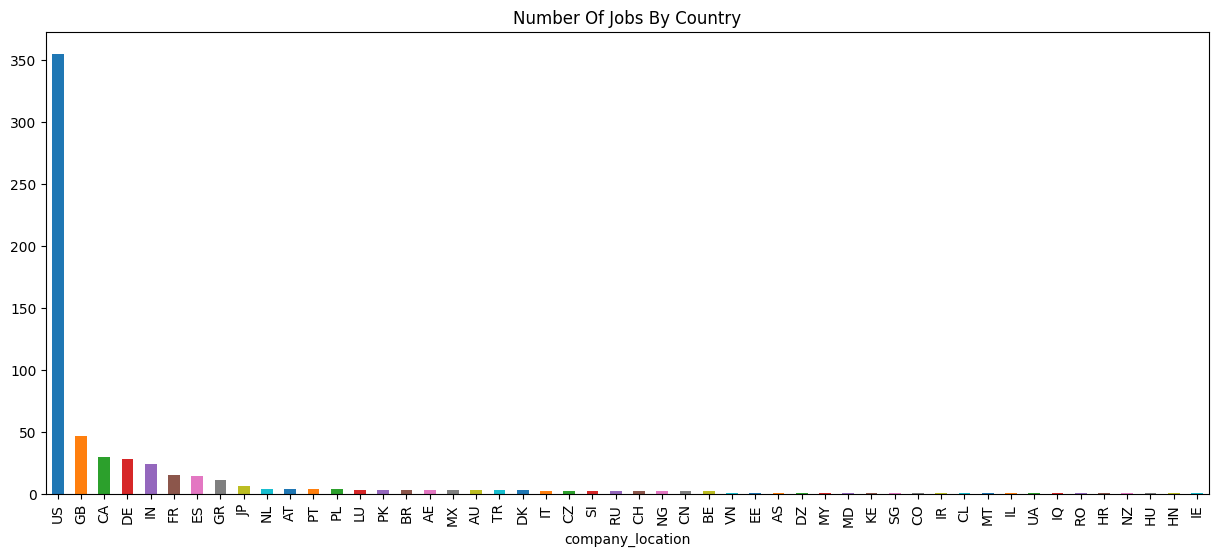

In [122]:
#Number Of Jobs By Country
plt.figure(figsize=(15,6))
data['company_location'].value_counts().plot(kind='bar',color=sns.color_palette("tab10"), title="Number Of Jobs By Country")

**350 out of 607 Jobs existing in the dataset are located in the United States. The second highest number is 47!**

## Job Titles All Of Them

<Axes: xlabel='job_title'>

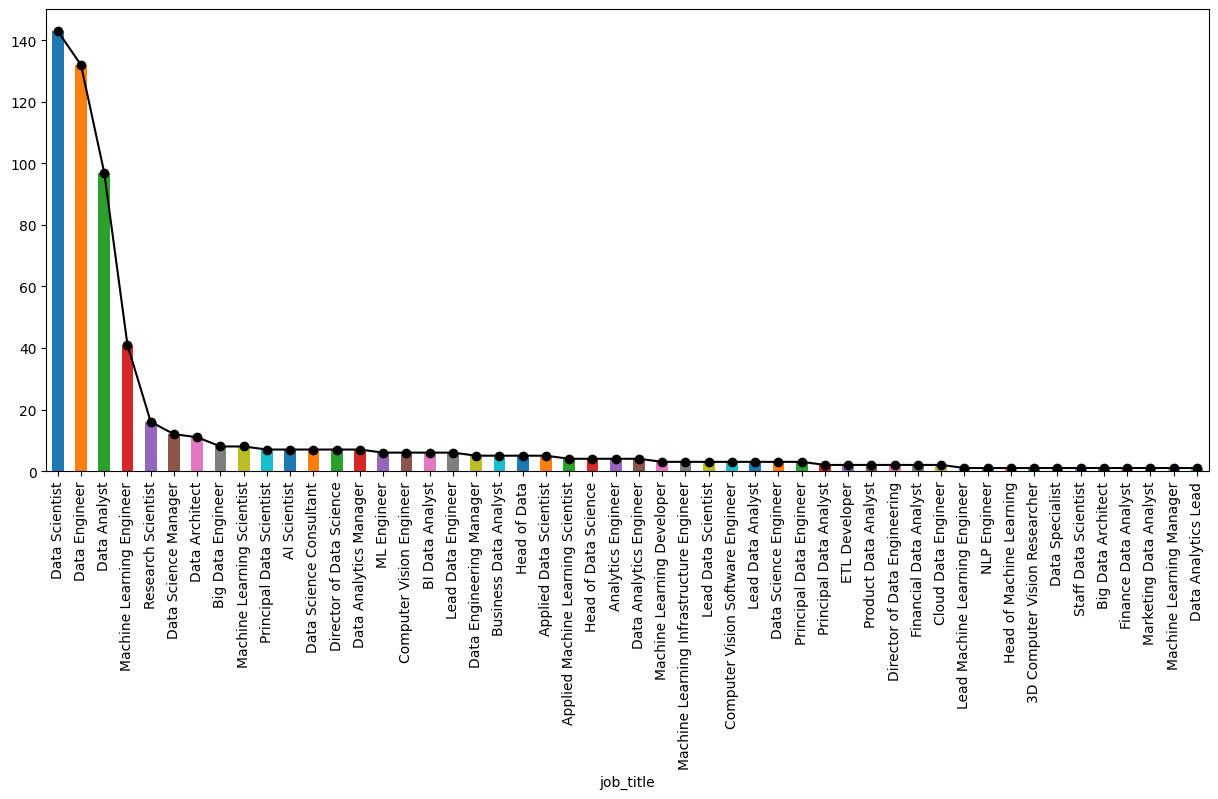

In [126]:
#job titles
plt.figure(figsize=(15,6))
data['job_title'].value_counts().plot(kind='line',color='black',marker="o")
data['job_title'].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))

## Job Titles Most In Demand

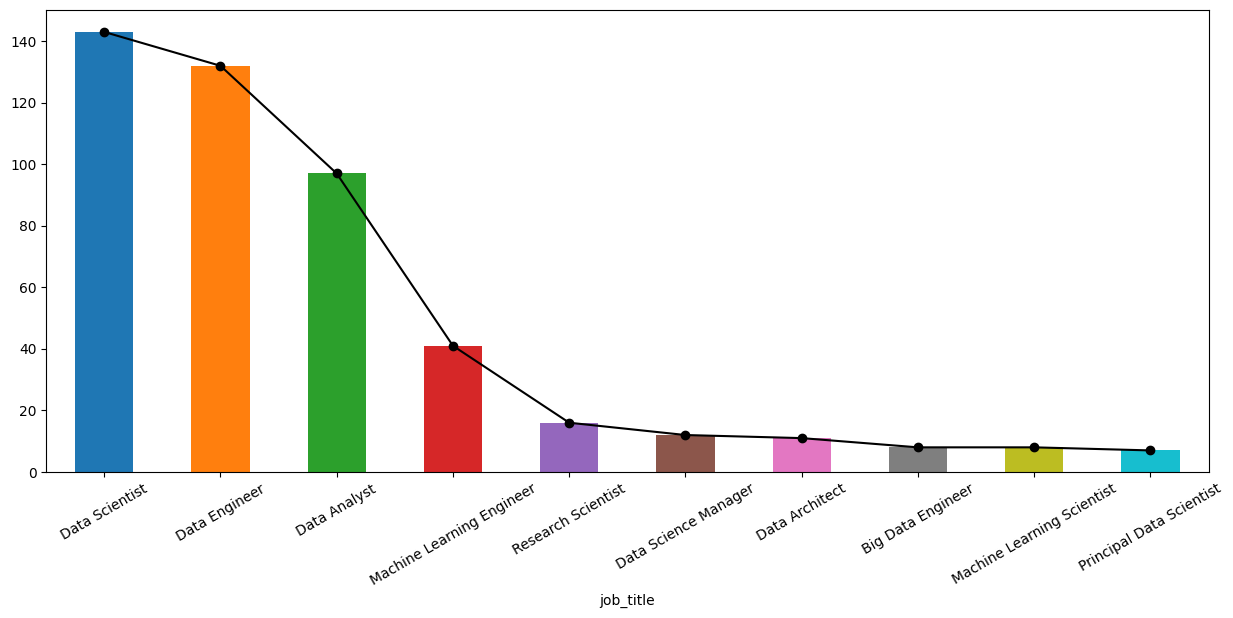

In [129]:
plt.figure(figsize=(15,6))

data['job_title'].value_counts()[:10].plot(kind='line',color='black',marker="o")
data['job_title'].value_counts()[:10].plot(kind='bar',color=sns.color_palette("tab10") )
plt.xticks(rotation = 30)
plt.show()

/var/folders/v0/87_rm9fx26qgc2ffgmn71pqc0000gn/T/ipykernel_3691/2424638644.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




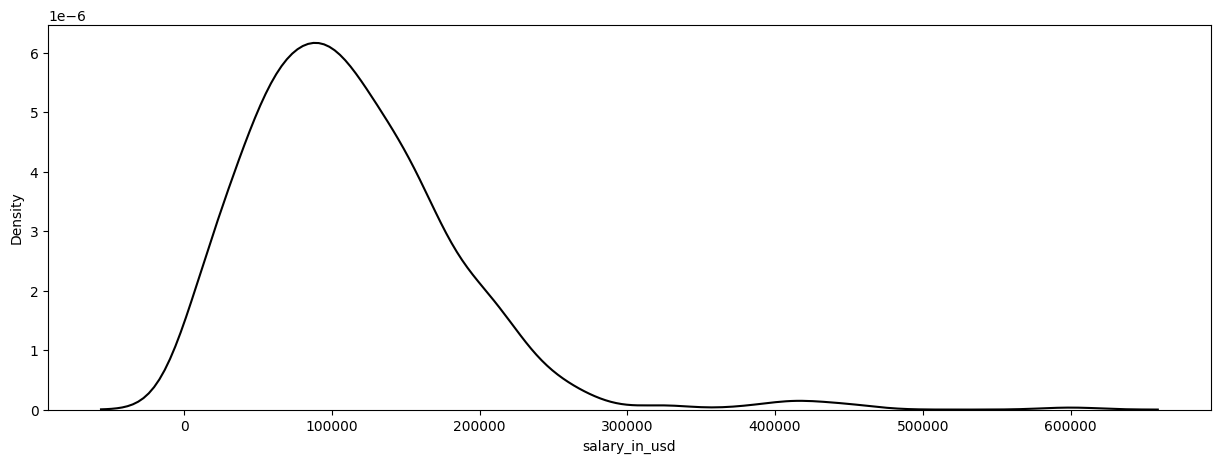

In [131]:
#distplot() function is used to plot the distplot. The distplot represents the univariate distribution of data i.e.
#data distribution of a variable against the density distribution.0
#right skwed outliear persent Salary columns

plt.figure(figsize=(15,5))
sns.distplot(data['salary_in_usd'],hist=False,color='black')
plt.show()

# **Bivariate/Multivariate Analysis**

**Numerical-Categorical**

In [135]:
data.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

**BOX_PLOT**


**FOR THE UNDERSTANDING OF BOX PLOTS**

![]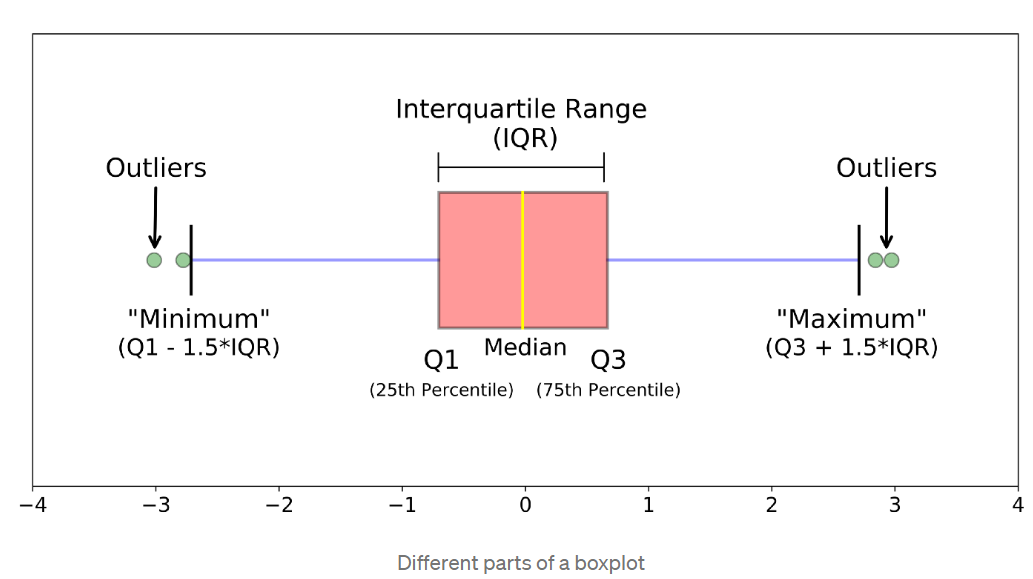

TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

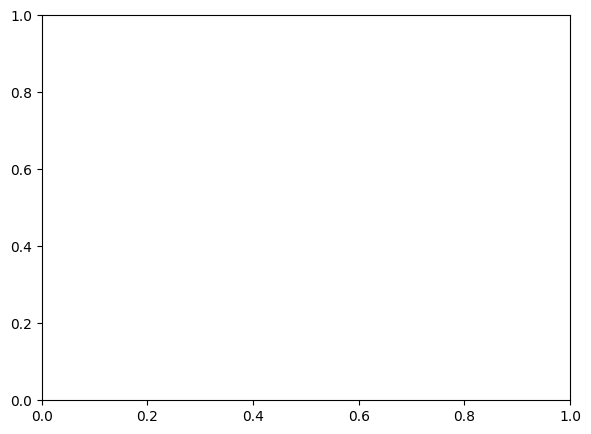

In [139]:
#salary in every year by Exprience_level using bar plot and box plot
# in box plot easyly detect the outlier
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(data['work_year'],data['salary_in_usd'],hue=data['experience_level'])
plt.subplot(1,2,2)
sns.boxplot(data['work_year'],data['salary_in_usd'],hue=data['experience_level'])
plt.show()
plt.show()

**Similarly we can check By 

TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

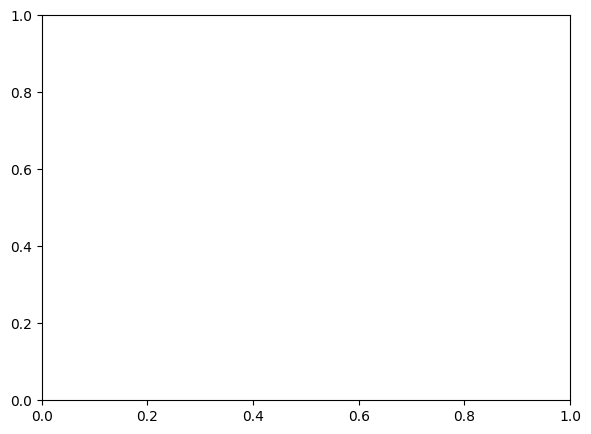

In [142]:
#salary in every year by type of employe using bar plot and box plot
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(data['work_year'],data['salary_in_usd'],hue=data['employment_type'])
plt.subplot(1,2,2)
sns.boxplot(data['work_year'],data['salary_in_usd'],hue=data['employment_type'])
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

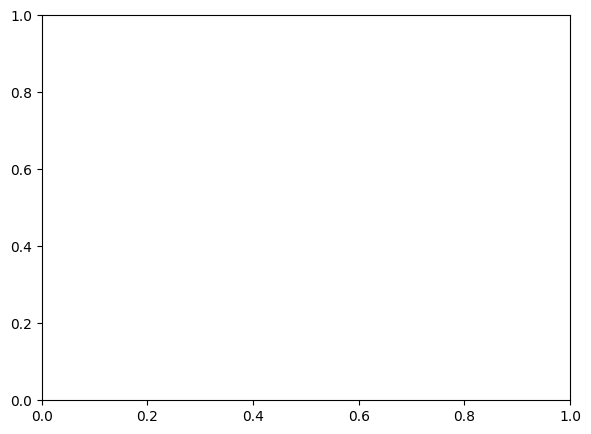

In [144]:
#salary with type of employee by exprience 
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(data['experience_level'],data['salary_in_usd'],hue=data['employment_type'])
plt.xticks(rotation = 30)
plt.subplot(1,2,2)
sns.boxplot(data['experience_level'],data['salary_in_usd'],hue=data['employment_type'])
plt.xticks(rotation = 30)
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

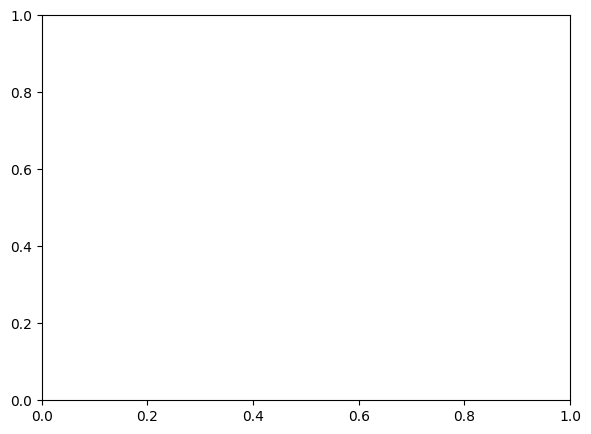

In [146]:
#salary in every year by remote_ratio using bar plot and box plot
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(data['work_year'],data['salary_in_usd'],hue=data['remote_ratio'])
plt.subplot(1,2,2)
sns.boxplot(data['work_year'],data['salary_in_usd'],hue=data['remote_ratio'])
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

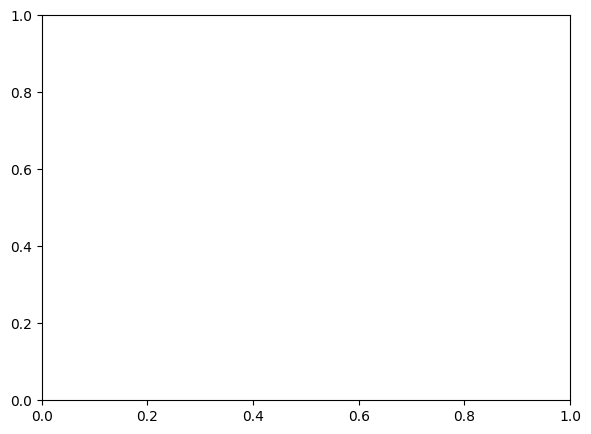

In [148]:
#salary in every year by company siaze using bar plot and box plot
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(data['work_year'],data['salary_in_usd'],hue=data['company_size'])
plt.subplot(1,2,2)
sns.boxplot(data['work_year'],data['salary_in_usd'],hue=data['company_size'])
plt.show()

/var/folders/v0/87_rm9fx26qgc2ffgmn71pqc0000gn/T/ipykernel_3691/3277979170.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/v0/87_rm9fx26qgc2ffgmn71pqc0000gn/T/ipykernel_3691/3277979170.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/v0/87_rm9fx26qgc2ffgmn71pqc0000gn/T/i

<Axes: xlabel='salary_in_usd', ylabel='Density'>

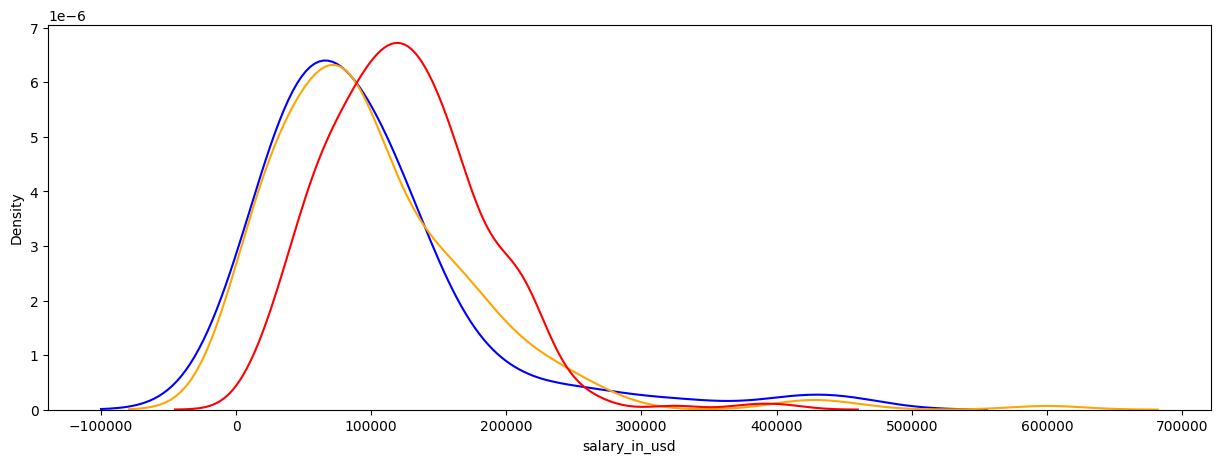

In [150]:
#every yeary salary is increase
plt.figure(figsize=(15,5))
sns.distplot(data[data['work_year']==2020]['salary_in_usd'],hist=False, color="blue")
sns.distplot(data[data['work_year']==2021]['salary_in_usd'],hist=False, color="orange")
sns.distplot(data[data['work_year']==2022]['salary_in_usd'],hist=False, color="red")

**This shows that the market is increasing and the demand with increasing salary by 2022**

/var/folders/v0/87_rm9fx26qgc2ffgmn71pqc0000gn/T/ipykernel_3691/3925813058.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/v0/87_rm9fx26qgc2ffgmn71pqc0000gn/T/ipykernel_3691/3925813058.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/v0/87_rm9fx26qgc2ffgmn71pqc0000gn/T/i

<Axes: xlabel='salary_in_usd', ylabel='Density'>

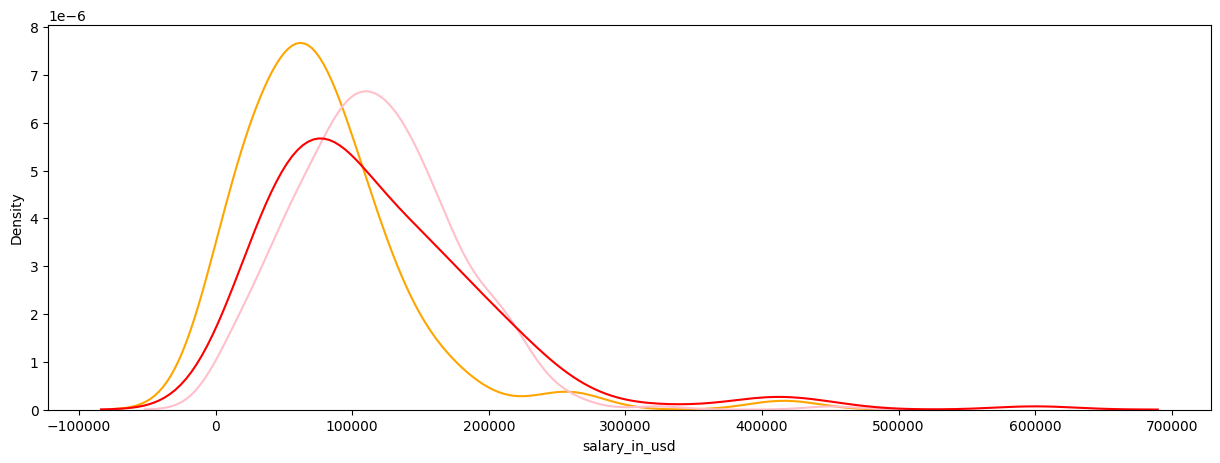

In [153]:
plt.figure(figsize=(15,5))
sns.distplot(data[data['company_size']=="Small"]['salary_in_usd'],hist=False,color="orange")
sns.distplot(data[data['company_size']=="Medium"]['salary_in_usd'],hist=False,color="pink")
sns.distplot(data[data['company_size']=="Large"]['salary_in_usd'],hist=False,color="red")

In [155]:
data.head(50)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,Mid Level/Intermediate,Full Time,Data Scientist,70000,EUR,79833,DE,0,DE,Large
1,1,2020,Senior Level/Expert,Full Time,Machine Learning Scientist,260000,USD,260000,JP,0,JP,Small
2,2,2020,Senior Level/Expert,Full Time,Big Data Engineer,85000,GBP,109024,GB,50,GB,Medium
3,3,2020,Mid Level/Intermediate,Full Time,Product Data Analyst,20000,USD,20000,HN,0,HN,Small
4,4,2020,Senior Level/Expert,Full Time,Machine Learning Engineer,150000,USD,150000,US,50,US,Large
5,5,2020,Entry Level/Junior,Full Time,Data Analyst,72000,USD,72000,US,100,US,Large
6,6,2020,Senior Level/Expert,Full Time,Lead Data Scientist,190000,USD,190000,US,100,US,Small
7,7,2020,Mid Level/Intermediate,Full Time,Data Scientist,11000000,HUF,35735,HU,50,HU,Large
8,8,2020,Mid Level/Intermediate,Full Time,Business Data Analyst,135000,USD,135000,US,100,US,Large
9,9,2020,Senior Level/Expert,Full Time,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,Small


/var/folders/v0/87_rm9fx26qgc2ffgmn71pqc0000gn/T/ipykernel_3691/2079562958.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/v0/87_rm9fx26qgc2ffgmn71pqc0000gn/T/ipykernel_3691/2079562958.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/v0/87_rm9fx26qgc2ffgmn71pqc0000gn/T/i

<Axes: xlabel='salary_in_usd', ylabel='Density'>

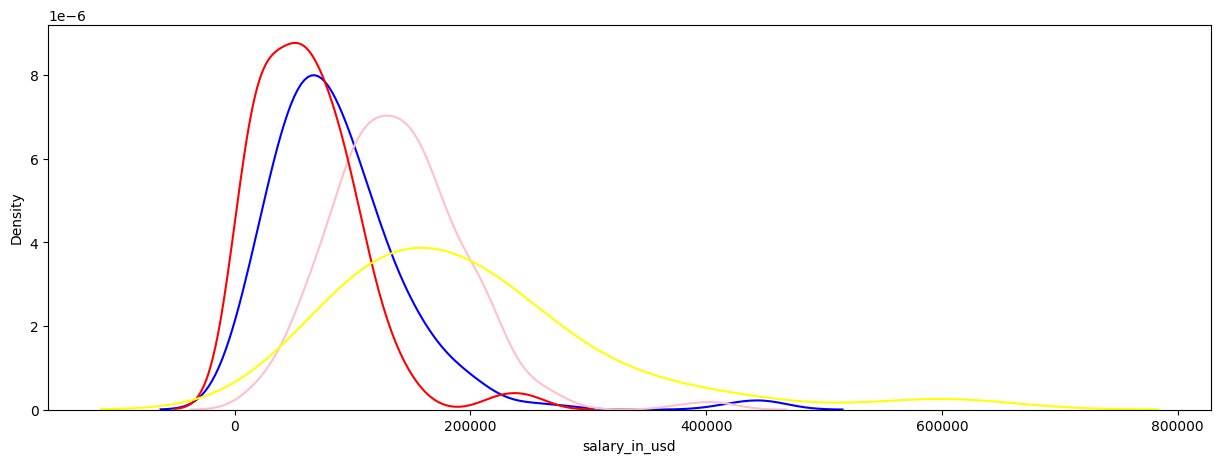

In [157]:
#salary depend on exprience
plt.figure(figsize=(15,5))
sns.distplot(data[data['experience_level']=="Mid Level/Intermediate"]['salary_in_usd'],hist=False, color="blue")
sns.distplot(data[data['experience_level']=="Senior Level/Expert"]['salary_in_usd'],hist=False, color="pink")
sns.distplot(data[data['experience_level']=="Entry Level/Junior"]['salary_in_usd'],hist=False, color="red")
sns.distplot(data[data['experience_level']=="Executive Level/Director"]['salary_in_usd'],hist=False, color="yellow")

**Heatmap**:Heatmap is defined as a graphical representation of data using colors to visualize the value of the matrix. In this, to represent more common values or higher activities brighter colors basically reddish colors are used and to represent less common or activity values, darker colors are preferred. Heatmap is also defined by the name of the shading matrix.

<Axes: xlabel='company_size', ylabel='work_year'>

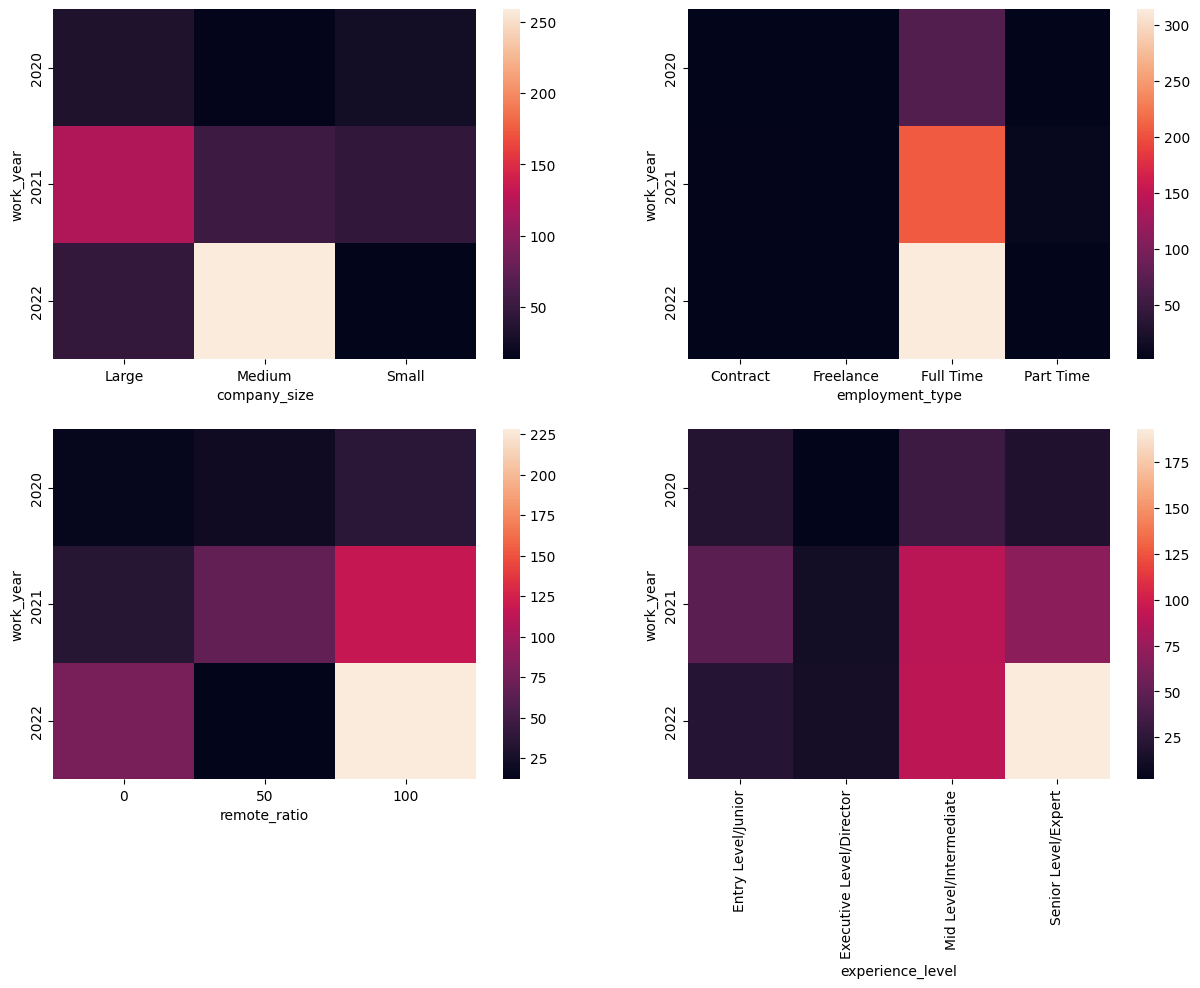

In [160]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,4)
#experience level by year
sns.heatmap(pd.crosstab(data['work_year'],data['experience_level']))
plt.subplot(2,2,2)
#employement_type by year
#FT employee is more in every year
sns.heatmap(pd.crosstab(data['work_year'],data['employment_type']))
plt.subplot(2,2,3)
#remote_ratio by year
sns.heatmap(pd.crosstab(data['work_year'],data['remote_ratio']))
plt.subplot(2,2,1)
#size of companies by year
sns.heatmap(pd.crosstab(data['work_year'],data['company_size']))

## Pairplot:
Plot pairwise relationships in a dataset.
By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column.
It is also possible to show a subset of variables or plot different variables on the rows and columns.
This is a high-level interface for PairGrid that is intended to make it easy to draw a few common styles. You should use PairGrid directly if you need more flexibility.

### Analyze entire dataset with pairplot

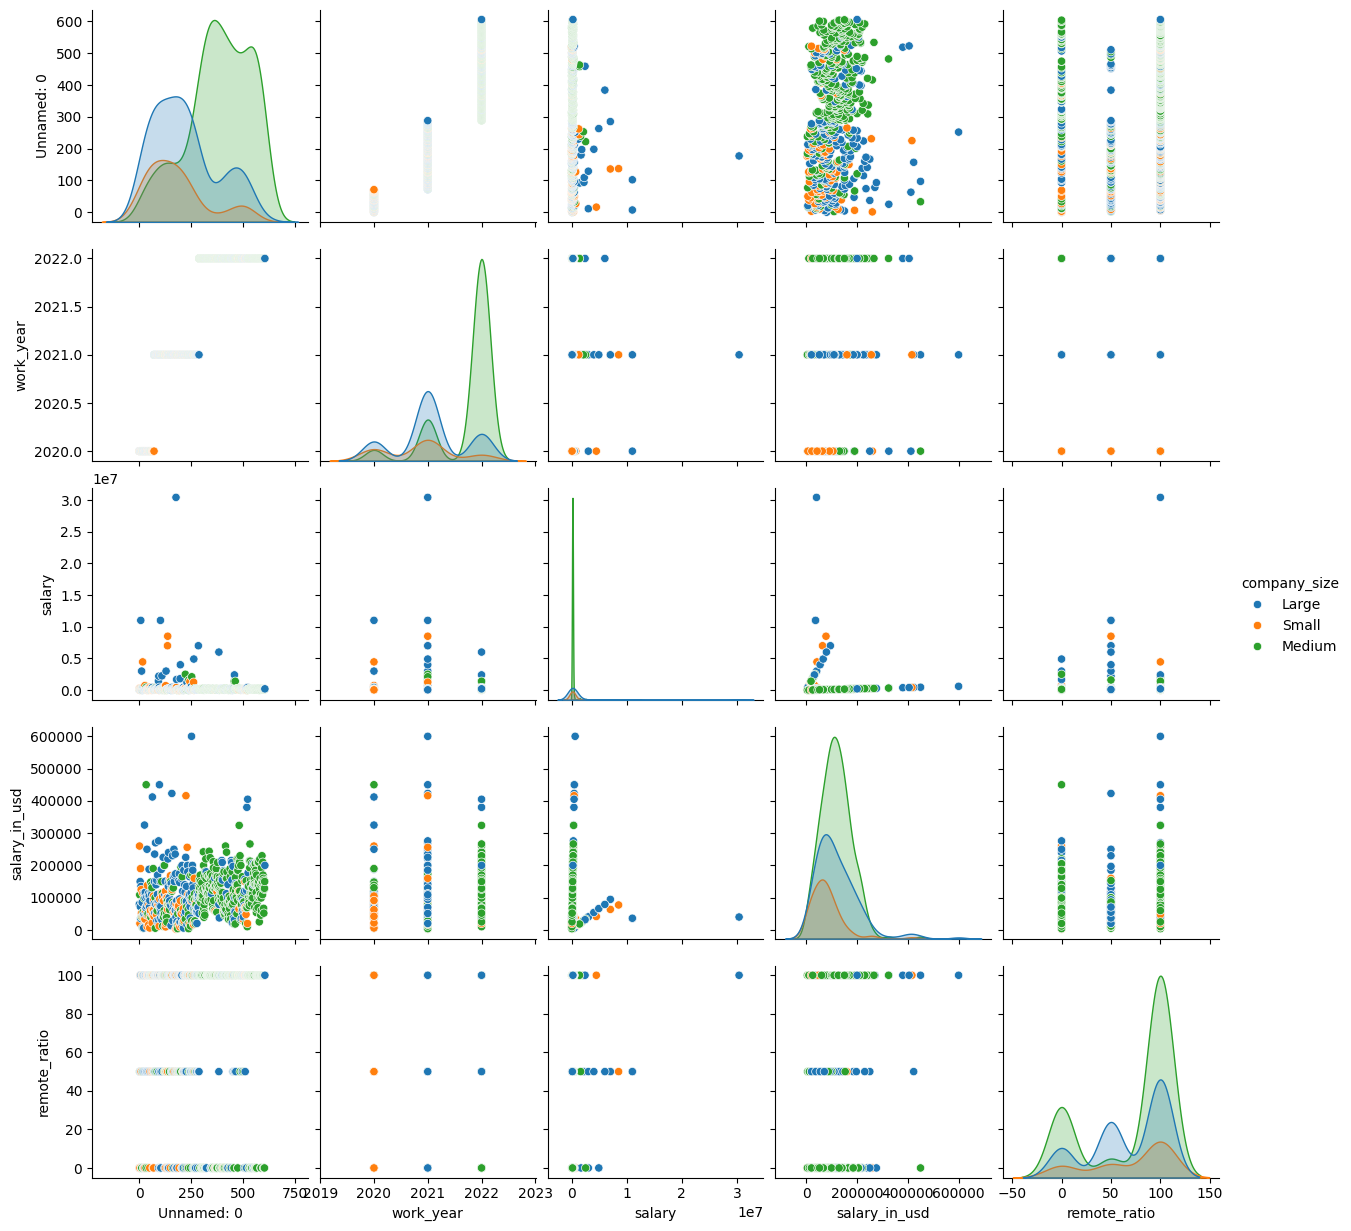

In [164]:

sns.pairplot(data,hue='company_size')

## ✅ Conclusion

- Remote work and larger companies generally pay higher salaries.
- Senior and executive roles earn significantly more than entry or mid-level.
- Countries like the US, Russia, and New Zealand lead in compensation.
- Job titles such as Principal Data Engineer and Director of Data Science are top earners.

### 🔭 Future Work
- Build an interactive dashboard with tools like Streamlit or PowerBI.

### 🔗 References
- [GitHub Repo](https://github.com/Rishav63/Data-Science-Job-Salaries.git)
